In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging


In [90]:
%store train_df

Stored 'train_df' (DataFrame)


# Data

In [5]:
sample_sub=pd.read_csv('sample_submission.csv')
sample_sub.head()

print(sample_sub.head(), "\n", sample_sub.shape)

   Id  Sales
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0 
 (41088, 2)


In [6]:
store=pd.read_csv('store.csv')
print(store.head(), "\n", store.shape)

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [7]:
test=pd.read_csv('test.csv')
print(test.head(), "\n", test.shape)

   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0 
 (41088, 8)


In [8]:
train=pd.read_csv('train.csv')
print(train.head(), "\n", train.shape)

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1   
 (1017209, 9)


C:\Users\user.DESKTOP-OMQ89VA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
#merge the store dataset with the train dataset

train_df = pd.merge(left=store, right=train, left_on='Store', right_on='Store')
display(train_df)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [10]:
#merge the store dataset with the train dataset

test_df = pd.merge(left=store, right=test, left_on='Store', right_on='Store')
test_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,4,2015-09-17,1.0,1,0,0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,857,3,2015-09-16,1.0,1,0,0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1713,2,2015-09-15,1.0,1,0,0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2569,1,2015-09-14,1.0,1,0,0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3425,7,2015-09-13,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",37664,3,2015-08-05,1.0,1,0,1
41084,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",38520,2,2015-08-04,1.0,1,0,1
41085,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",39376,1,2015-08-03,1.0,1,0,1
41086,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",40232,7,2015-08-02,0.0,0,0,1


# Exploratory Data Analysis

In [11]:
# number of data points
print(f" Number of rows:  {train_df.shape[0]} \n Number of columns: {train_df.shape[1]} ")
#statistical summary of the columns
train_df.describe()


 Number of rows:  1017209 
 Number of columns: 18 


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [13]:
#convert timestamp to datetime format and inserts it the column 'timestamp'
def convert_str_datetime(df):
    df['Date']=pd.to_datetime(df.Date)
    return df
    
convert_str_datetime(train_df)    


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [14]:
#number of unique values per column
def unique_values(df):
    unique_values=pd.DataFrame(df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), 
                           columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
    return unique_values

unique_values(train_df)

,Unique Value Count
SchoolHoliday,2
Promo,2
Open,2
Promo2,2
Assortment,3
StoreType,4
PromoInterval,4
StateHoliday,5
DayOfWeek,7
Promo2SinceYear,8


In [15]:
# duplicated data
def duplicated_data(df):
    return df[df.duplicated()].sum()

duplicated_data(train_df)

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
DayOfWeek                    0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
dtype: float64

There are no duplicated rows in this dataframe

In [16]:
# the percentage of missing values in the dataset
def missing_values(x):
    # Total number of elements in the dataset
    totalCells = x.size
    #Number of missing values per column
    missingCount = x.isnull().sum()
    #Total number of missing values
    totalMissing = missingCount.sum()
    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

missing_values(train_df)

The dataset contains 11.87 % missing values.


In [17]:
def column_missingdata(df):
    #check for missing values per column
    values=df.isnull().sum().sort_values(ascending=False)
    #percentage of missing values per column
    percentage=df.isnull().mean()*100
    return values,percentage

column_missingdata(train_df)

(Promo2SinceYear              508031
 Promo2SinceWeek              508031
 PromoInterval                508031
 CompetitionOpenSinceMonth    323348
 CompetitionOpenSinceYear     323348
 CompetitionDistance            2642
 StoreType                         0
 Assortment                        0
 Promo2                            0
 SchoolHoliday                     0
 StateHoliday                      0
 DayOfWeek                         0
 Date                              0
 Sales                             0
 Customers                         0
 Open                              0
 Promo                             0
 Store                             0
 dtype: int64,
 Store                         0.000000
 StoreType                     0.000000
 Assortment                    0.000000
 CompetitionDistance           0.259730
 CompetitionOpenSinceMonth    31.787764
 CompetitionOpenSinceYear     31.787764
 Promo2                        0.000000
 Promo2SinceWeek              49.943620

### Dealing with missing values

In [18]:
#selecting rows where the row CompetitionDistance has no missing values
#train_df=train_df[train_df['CompetitionDistance'].notna()]
#train_df

2642 rows have been dropped

In [19]:
#replace missing values with mean 
def fill_mean(dataframe,column):
    dataframe[column].fillna(dataframe[column].mean(), inplace = True)
    return dataframe

# replacing with the median
def fill_median(dataframe,column):
    dataframe[column].fillna(dataframe[column].median(), inplace = True)
    return dataframe

#fill with mode
def fill_mode(dataframe,column):
    dataframe[column].fillna(dataframe[column].mode(), inplace = True)
    return dataframe

#replaces all missing values with 0
def fill_with_0(dataframe):
    dataframe.fillna(0, inplace=True)
    return dataframe

In [88]:
train_df=fill_mean(train_df,'CompetitionDistance')
train_df=fill_mean(train_df,'CompetitionOpenSinceMonth')
train_df=fill_mean(train_df,'CompetitionOpenSinceYear')
train_df=fill_mode(train_df,'Promo2SinceWeek')
train_df=fill_median(train_df,'Promo2SinceYear')
train_df=fill_median(train_df,'Promo2SinceWeek')
fill_with_0(train_df)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,WeekOfYear,year,month,day_name,Weekend
0,1,c,a,1270.0,9.000000,2008.000000,0,14.0,2011.0,0,...,555,1,1,0,1,31,2015,7,Friday,0.0
1,1,c,a,1270.0,9.000000,2008.000000,0,22.0,2012.0,0,...,546,1,1,0,1,31,2015,7,Thursday,0.0
2,1,c,a,1270.0,9.000000,2008.000000,0,22.0,2012.0,0,...,523,1,1,0,1,31,2015,7,Wednesday,0.0
3,1,c,a,1270.0,9.000000,2008.000000,0,22.0,2012.0,0,...,560,1,1,0,1,31,2015,7,Tuesday,0.0
4,1,c,a,1270.0,9.000000,2008.000000,0,22.0,2012.0,0,...,612,1,1,0,1,31,2015,7,Monday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,7.222866,2008.690228,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,339,1,0,0,1,1,2013,1,Saturday,1.0
1017205,1115,d,c,5350.0,7.222866,2008.690228,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,326,1,0,0,1,1,2013,1,Friday,0.0
1017206,1115,d,c,5350.0,7.222866,2008.690228,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,300,1,0,0,1,1,2013,1,Thursday,0.0
1017207,1115,d,c,5350.0,7.222866,2008.690228,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,305,1,0,0,1,1,2013,1,Wednesday,0.0


In [89]:
column_missingdata(train_df)

(Weekend                      0
 DayOfWeek                    0
 StoreType                    0
 Assortment                   0
 CompetitionDistance          0
 CompetitionOpenSinceMonth    0
 CompetitionOpenSinceYear     0
 Promo2                       0
 Promo2SinceWeek              0
 Promo2SinceYear              0
 PromoInterval                0
 Date                         0
 day_name                     0
 Sales                        0
 Customers                    0
 Open                         0
 Promo                        0
 StateHoliday                 0
 SchoolHoliday                0
 WeekOfYear                   0
 year                         0
 month                        0
 Store                        0
 dtype: int64,
 Store                        0.0
 StoreType                    0.0
 Assortment                   0.0
 CompetitionDistance          0.0
 CompetitionOpenSinceMonth    0.0
 CompetitionOpenSinceYear     0.0
 Promo2                       0.0
 Promo2Sinc

### Feature creation

In [21]:
def features_create(data):
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear

# Graphical Analysis

In [22]:
# outliers
def boxplot(df,col):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.boxplot(y=df[col])


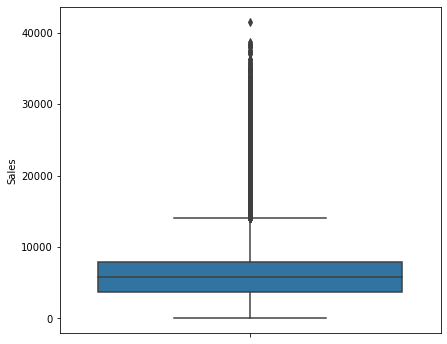

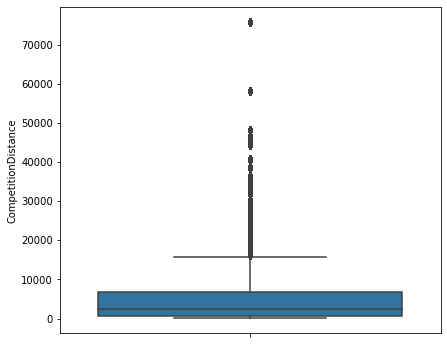

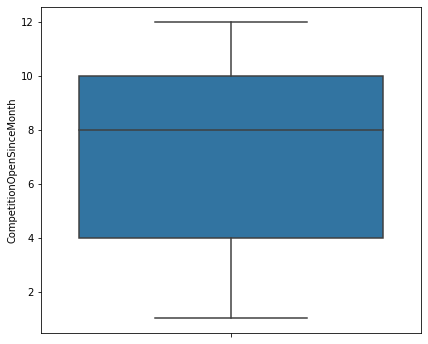

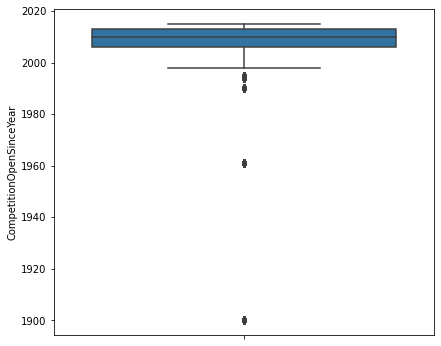

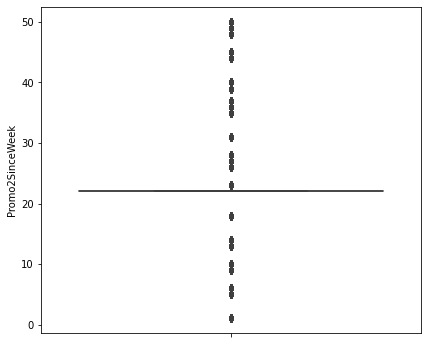

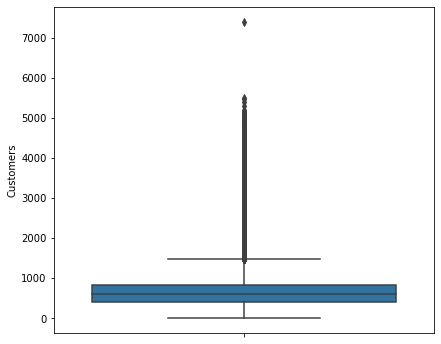

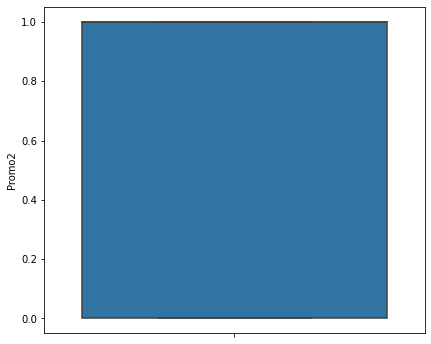

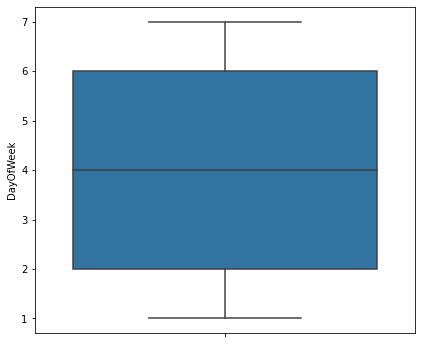

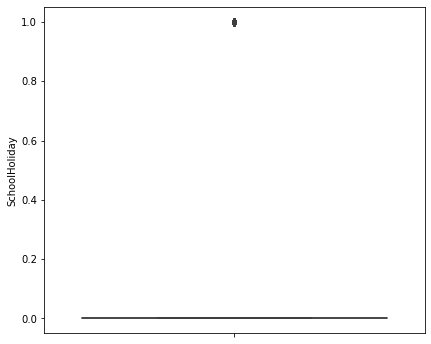

In [23]:
boxplot(train_df,'Sales')
boxplot(train_df,'CompetitionDistance')
boxplot(train_df,'CompetitionOpenSinceMonth')
boxplot(train_df,'CompetitionOpenSinceYear')
boxplot(train_df,'Promo2SinceWeek')
boxplot(train_df,'Customers')
boxplot(train_df,'Promo2')
boxplot(train_df,'DayOfWeek')
boxplot(train_df,'SchoolHoliday')


In [24]:
train_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [25]:
#plots
def barplot(x,y,data):
    sns.barplot(x=x,y=y,data=data) 
    plt.show()
    
def count_plot(x,data):
    plt.figure(figsize=(8,5))
    sns.countplot(x=x,data=data)    

### Check for distributions in both training and test sets - are the promotions distributed similarly between these two groups?


C:\Users\user.DESKTOP-OMQ89VA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Promotions')]

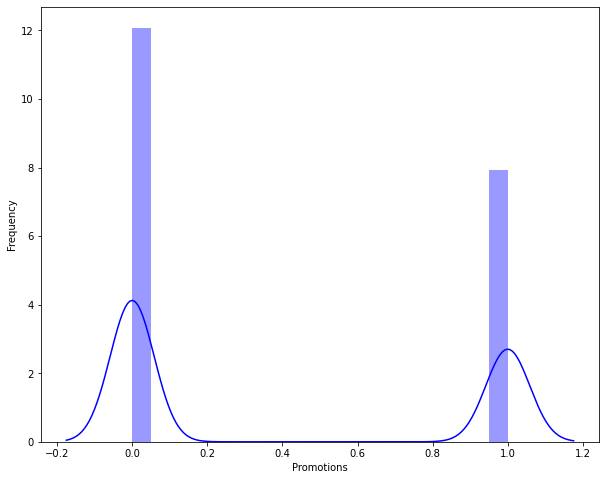

In [26]:
# promotions,
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(test['Promo'],bins=20,color='blue')
ax.set(ylabel='Frequency')
ax.set(xlabel='Promotions')

C:\Users\user.DESKTOP-OMQ89VA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Promotions')]

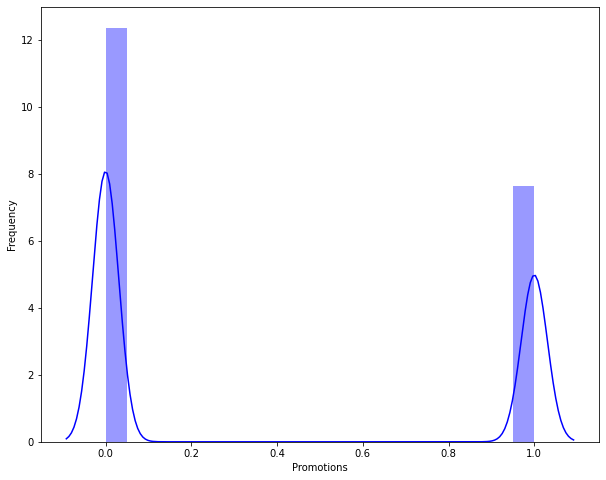

In [27]:
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(train_df['Promo'],bins=20,color='blue')
ax.set(ylabel='Frequency')
ax.set(xlabel='Promotions')

The distributions of promotions  the train and test set are similar

### Check and compare sales behavior before,during and after holidays

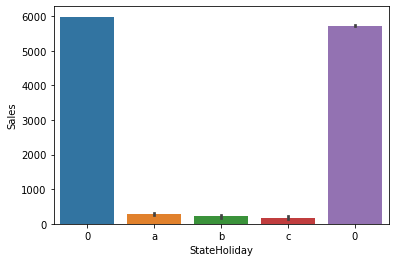

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [28]:
holidays_df=train_df[['Sales','StateHoliday','SchoolHoliday']]
holidays_df.head()
# comparison between sales on holidays and on other days
sns.barplot(x='StateHoliday',y='Sales',data=holidays_df) 
plt.show()
holidays_df['StateHoliday'].unique()   

In [29]:
# combine the value '0' with the value 0
train_df['StateHoliday'].loc[train_df['StateHoliday']==0]='0'
train_df['StateHoliday'].unique() 

C:\Users\user.DESKTOP-OMQ89VA\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


array(['0', 'a', 'b', 'c'], dtype=object)

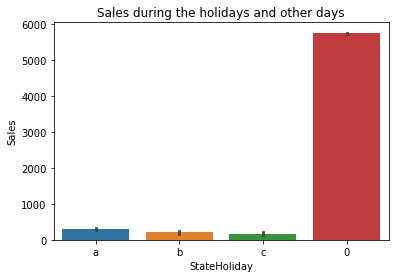

In [30]:
# sales during other days
other_days=holidays_df.loc[holidays_df['StateHoliday']=='0']
#sales duting holidays
holidays=holidays_df.loc[holidays_df['StateHoliday']!='0']

#plots
sns.barplot(x='StateHoliday',y='Sales',data=holidays) 
plt.title('Sales during the holidays and other days')
plt.show()
    
#groupby during holidays, after holidays(1 week), before holidays(1 week)


### Seasonal Purchasing behaviours

Text(0.5, 1.0, 'Store 10 sales distribution')

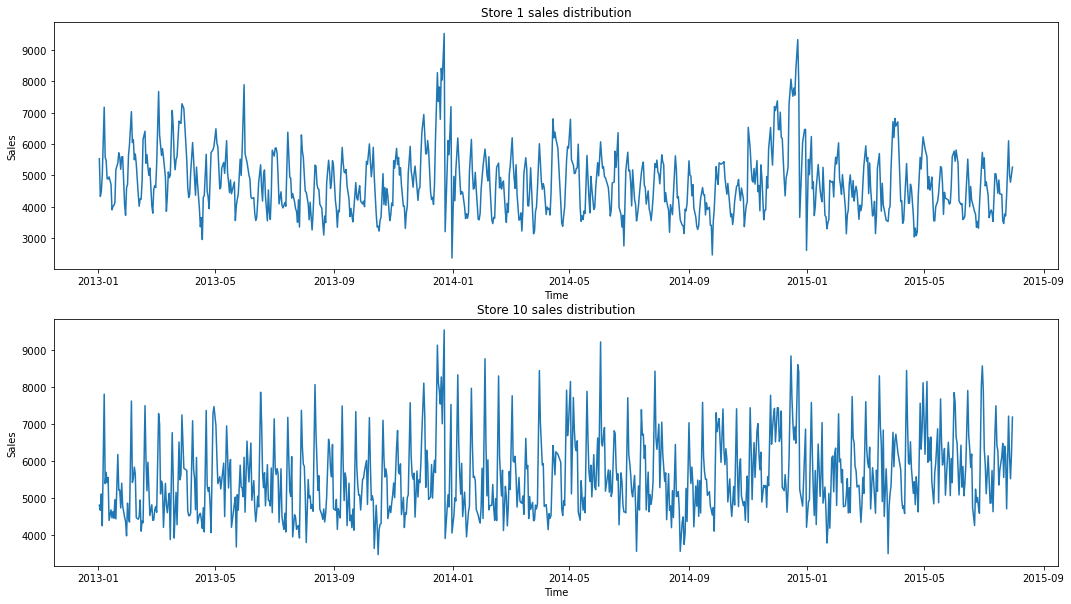

In [31]:
store_1=train_df.loc[(train_df['Store']==1)& (train_df['Sales']>0),['Date','Sales']]
store_10=train_df.loc[(train_df['Store']==10)& (train_df['Sales']>0),['Date','Sales']]
fig=plt.figure(figsize=(18,10))
ax1=fig.add_subplot(211)
ax1.plot(store_1['Date'],store_1['Sales'],'-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 1 sales distribution')

ax2=fig.add_subplot(212)
ax2.plot(store_10['Date'],store_10['Sales'],'-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 10 sales distribution')

Text(0.5, 1.0, 'Before Christmas sales distribution')

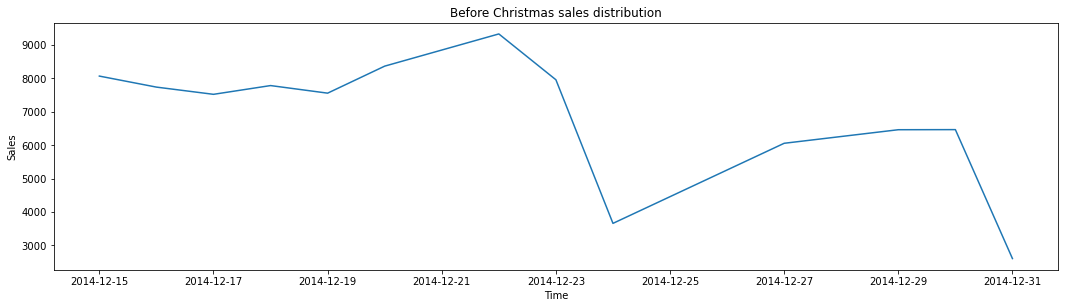

In [32]:
#before christmas
start_date='2014-12-14'
end_date='2014-12-31'
mask=(train_df['Date']>start_date)&(train_df['Date']<=end_date)
beforeChristmas=train_df.loc[mask ]
beforeChristmas

beforeChristmaswk=beforeChristmas.loc[(beforeChristmas['Store']==1)& (beforeChristmas['Sales']>0),['Date','Sales']]
fig=plt.figure(figsize=(18,10))
ax1=fig.add_subplot(211)
ax1.plot(beforeChristmaswk['Date'],beforeChristmaswk['Sales'],'-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Before Christmas sales distribution')

In [33]:
#week before christmas
#2014-12-14 to 2014-12-21
#christmas week
#2014-12-22 to 2014-12-28
#week after christmas
#2014-12-31 to 2015-1-5

In [34]:
# sales and customers during christmas
#groupby christmas holiday and compare sales with other days, seasonality during christmas 

In [35]:
#sales and customers during easter

In [36]:
#sales and customers during public holidays

### Correlation between sales and number of customers

In [37]:
#creation of a correlation matrix
corrM=train_df.corr()
corrM

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.026394,-0.050746,-0.004592,0.008488,0.007608,0.038929,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
CompetitionDistance,-0.026394,1.000000,-0.061624,0.025397,-0.139704,-0.035826,-0.109421,-0.000025,-0.019210,-0.102780,0.007981,0.000138,-0.003684
CompetitionOpenSinceMonth,-0.050746,-0.061624,1.000000,-0.060594,-0.009383,-0.025160,0.050325,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526
CompetitionOpenSinceYear,-0.004592,0.025397,-0.060594,1.000000,-0.077336,-0.068183,0.012155,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520
Promo2,0.008488,-0.139704,-0.009383,-0.077336,1.000000,0.063499,0.000634,0.000168,-0.091040,-0.150159,-0.008309,-0.000983,-0.006909
Promo2SinceWeek,0.007608,-0.035826,-0.025160,-0.068183,0.063499,1.000000,-0.244154,0.000133,0.032521,0.014515,-0.002256,-0.000775,-0.002639
Promo2SinceYear,0.038929,-0.109421,0.050325,0.012155,0.000634,-0.244154,1.000000,0.000048,-0.021127,0.028974,0.001636,-0.000284,-0.003684
DayOfWeek,-0.000008,-0.000025,0.000006,-0.000025,0.000168,0.000133,0.000048,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.019210,-0.028257,0.012659,-0.091040,0.032521,-0.021127,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.102780,-0.030954,0.008931,-0.150159,0.014515,0.028974,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568


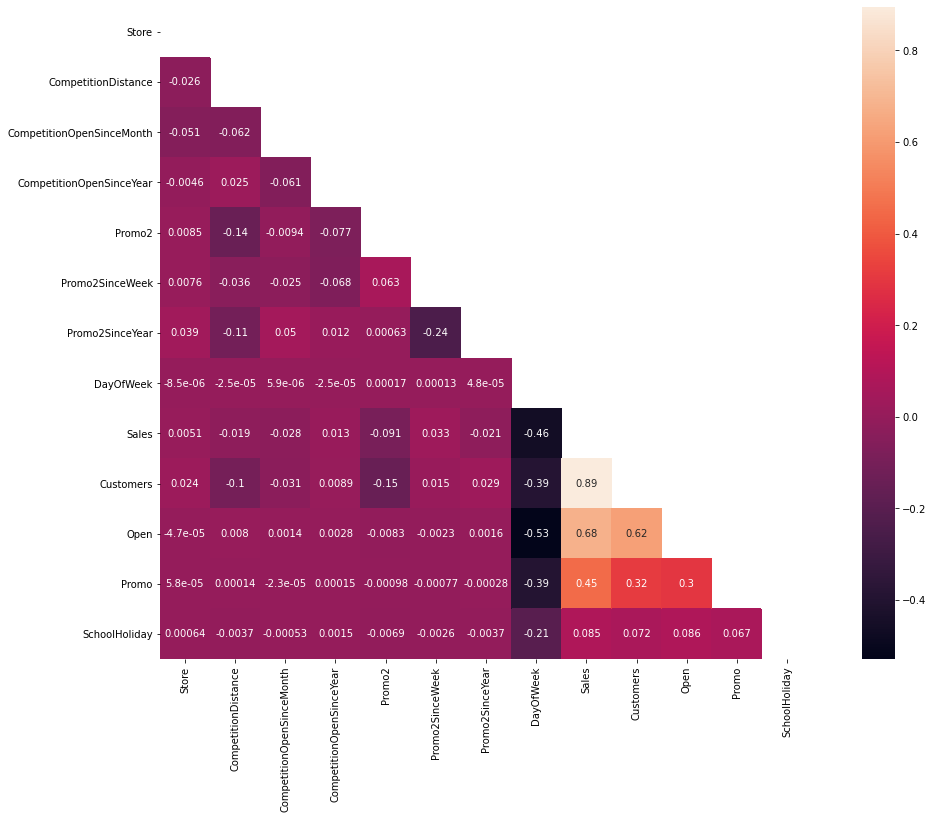

In [38]:
matrix=np.triu(train_df.corr())

sns.heatmap(corrM,annot=True,square=True,mask=matrix)
fig=plt.gcf()
figsize=fig.get_size_inches()
fig.set_size_inches(figsize*3)
plt.show()

The number of customers and volume of sales are highly correlated with a score of 89%. This indicates that the more the number of customers the higher the level of sales

### How does promo affect sales

From the correlation matrix above promo and sales are positively correlated with a score of 45%. Therefore an a promotion leads to an increase in sales volume

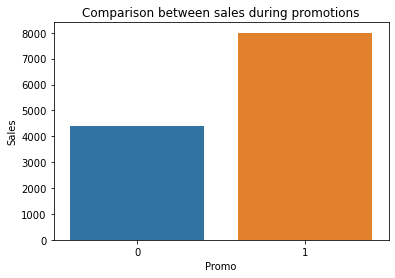

In [39]:
sns.barplot(x='Promo',y='Sales',data=train_df) 
plt.title('Comparison between sales during promotions')
plt.show()

1 represents a promotion being ran while 0 represents no promotion. From the above graph, the sales volume is increased by about 50% when there is a promotion running.
This could be an indicator that the promotion is attracting new customers and also serves as a reminder to existing customers to buy more product

### Which stores should the promos be deployed in
    
    


Text(0.5, 1.0, 'Count per store model')

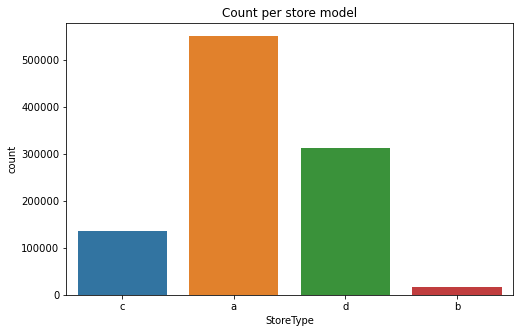

In [40]:
count_plot(x='StoreType',data=train_df)
plt.title('Count per store model')


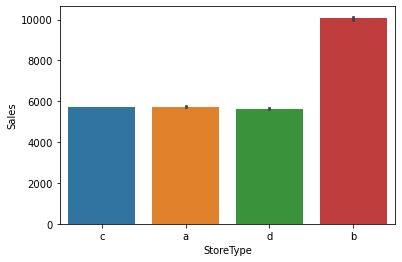

In [41]:
barplot(x='StoreType',y='Sales',data=train_df) 
plt.show()

The model 'a' type are the most while model 'b' are the least. However store model 'b' contributes the most to the sales volume

In [42]:
#stores that ran a promotion
store_promo=train_df.loc[train_df['Promo']==1]
store_promo

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017198,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-11,5142,351,1,1,0,1
1017199,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-10,5007,339,1,1,0,1
1017200,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-09,4649,324,1,1,0,1
1017201,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,2013-01-08,5243,341,1,1,0,1


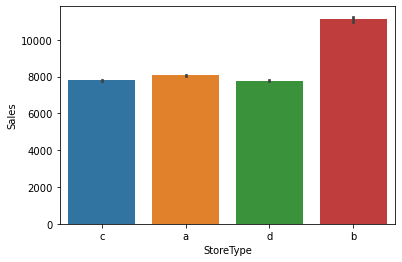

In [43]:
barplot(x='StoreType',y='Sales',data=store_promo) 
plt.show()

Text(0.5, 1.0, 'Count per store model')

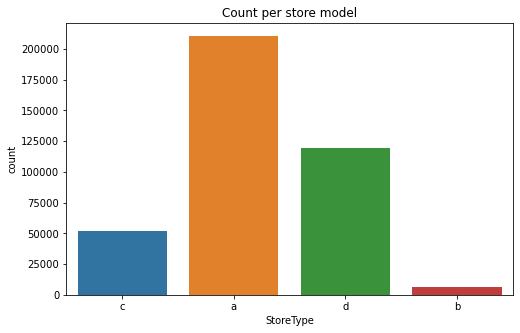

In [44]:
count_plot(x='StoreType',data=store_promo)
plt.title('Count per store model')

In [45]:
#str_promo.plot(x="StoreType",kind='bar',stacked=True)

### Trends of customer behaviour during store open and closing times

In [46]:
train_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [47]:
#splitting date column into day_name,month,weekdef features_create(data):
def features_create(data): 
    data['WeekOfYear'] = data.Date.dt.weekofyear
    data['year']=train_df['Date'].dt.year
    data['month']=train_df['Date'].dt.month
    data['day_name']=train_df['Date'].dt.day_name()
    return data
features_create(train_df)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,WeekOfYear,year,month,day_name
0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,NaN,...,5263,555,1,1,0,1,31,2015,7,Friday
1,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,...,5020,546,1,1,0,1,31,2015,7,Thursday
2,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,...,4782,523,1,1,0,1,31,2015,7,Wednesday
3,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,...,5011,560,1,1,0,1,31,2015,7,Tuesday
4,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,...,6102,612,1,1,0,1,31,2015,7,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,4771,339,1,0,0,1,1,2013,1,Saturday
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,4540,326,1,0,0,1,1,2013,1,Friday
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,4297,300,1,0,0,1,1,2013,1,Thursday
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,3697,305,1,0,0,1,1,2013,1,Wednesday


In [48]:

train_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'WeekOfYear', 'year', 'month', 'day_name'],
      dtype='object')

# Which stores are opened on all weekdays

In [49]:
# creates a 'Weekend' column where 0 represents a weekday and 1 a weekend
train_df.loc[(train_df['day_name']=='Saturday')|(train_df['day_name']=='Sunday'),'Weekend']=1
train_df['Weekend']=train_df['Weekend'].fillna(0)
train_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,WeekOfYear,year,month,day_name,Weekend
0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,NaN,...,555,1,1,0,1,31,2015,7,Friday,0.0
1,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,...,546,1,1,0,1,31,2015,7,Thursday,0.0
2,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,...,523,1,1,0,1,31,2015,7,Wednesday,0.0
3,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,...,560,1,1,0,1,31,2015,7,Tuesday,0.0
4,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,...,612,1,1,0,1,31,2015,7,Monday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,339,1,0,0,1,1,2013,1,Saturday,1.0
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,326,1,0,0,1,1,2013,1,Friday,0.0
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,300,1,0,0,1,1,2013,1,Thursday,0.0
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,305,1,0,0,1,1,2013,1,Wednesday,0.0


Text(0.5, 1.0, 'Comparison of sales per store on weekends and weekdays')

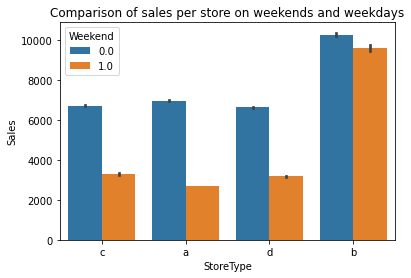

In [50]:
sns.barplot(y='Sales',x='StoreType',hue='Weekend',data=train_df)
plt.title('Comparison of sales per store on weekends and weekdays')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

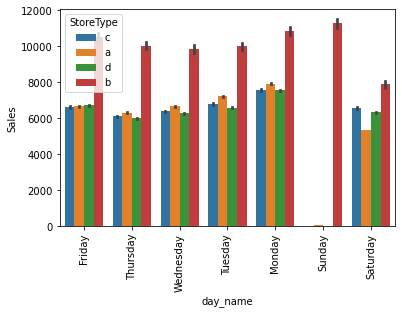

In [51]:
sns.barplot(y='Sales',x='day_name',hue='StoreType',data=train_df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

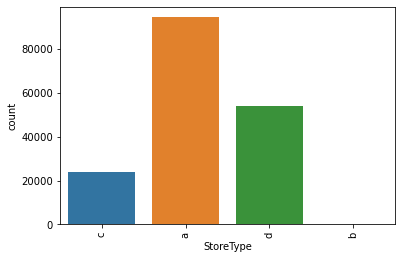

In [52]:

#dataframe where a store is closed on any day(open=0)
closedstore_df=train_df.loc[(train_df['Open']==0)].copy()
closedstore_df['StoreType'].unique()
closedstore_df

sns.countplot(x='StoreType',data=closedstore_df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

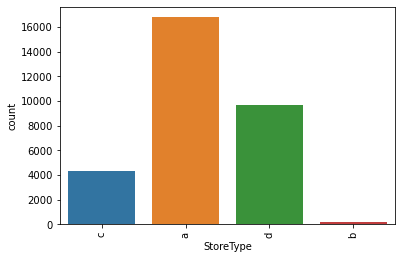

In [53]:
#dataframe where a store is closed on any weekday(open=0,weekend=0)
closedstoreWeekend_df=train_df.loc[(train_df['Open']==0) & (train_df['Weekend']==0)].copy()
closedstoreWeekend_df['StoreType'].unique()
closedstoreWeekend_df

sns.countplot(x='StoreType',data=closedstoreWeekend_df)
plt.xticks(rotation=90)

The model type 'a' has the most stores closed the most during the weekdays while model type 'b' has the least number of store closed during the week.This could explain why model type 'b' has the largest sales  volume

#### How does this affect their sales on weekends

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

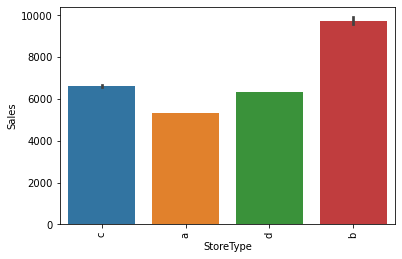

In [54]:
#plot of sales in closed stores during the weekend
closedstoreWeekend_df=train_df.loc[(train_df['Open']==1) & (train_df['Weekend']==1)].copy()
closedstoreWeekend_df['StoreType'].unique()
closedstoreWeekend_df

sns.barplot(y='Sales', x='StoreType',data=closedstoreWeekend_df)
plt.xticks(rotation=90)

From the above plots, model type 'b' has the most sales volume during the weekend, while model type 'a ' has the least sales volume during the weekend

### Check how assortment type affects sales

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

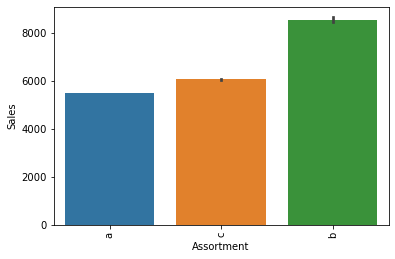

In [55]:
sns.barplot(y='Sales',x='Assortment',data=train_df)
plt.xticks(rotation=90)

The assortment levels have been categorised as follows a=basic, b=extra, c= extended. The extra assortment type has the most sales while the basic assortment type has the least sales volume

### How does the distance to the next competitor affect sales

In [56]:
train_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,WeekOfYear,year,month,day_name,Weekend
0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,NaN,...,555,1,1,0,1,31,2015,7,Friday,0.0
1,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,...,546,1,1,0,1,31,2015,7,Thursday,0.0
2,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,...,523,1,1,0,1,31,2015,7,Wednesday,0.0
3,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,...,560,1,1,0,1,31,2015,7,Tuesday,0.0
4,1,c,a,1270.0,9.0,2008.0,0,22.0,NaN,NaN,...,612,1,1,0,1,31,2015,7,Monday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,339,1,0,0,1,1,2013,1,Saturday,1.0
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,326,1,0,0,1,1,2013,1,Friday,0.0
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,300,1,0,0,1,1,2013,1,Thursday,0.0
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,305,1,0,0,1,1,2013,1,Wednesday,0.0


In [57]:
#relationship betweeen cdistance from competitor and sales
competitorDist=train_df[['CompetitionDistance','Sales']].copy()
#correlation matrix
#creation of a correlation matrix
corr=competitorDist.corr()
corr



,CompetitionDistance,Sales
CompetitionDistance,1.00000,-0.01921
Sales,-0.01921,1.00000


The correlation between CompetitionDistance and Sales is -1.9% which indicates that there is very little association between the distance from competition and the level of sales. The negative indicates that there is a weakly negative correlation therefore if the distance from competition is large then the  level of sales is will reduce

#### What if the store and its competitors are in the same city? does distance matter?


In [58]:
#assuming the distance between a store to its competition is less than 10000meters
competition=competitorDist.loc[(competitorDist['CompetitionDistance']<=10000)]
towncorr=competition.corr()
towncorr

,CompetitionDistance,Sales
CompetitionDistance,1.000000,-0.043442
Sales,-0.043442,1.000000


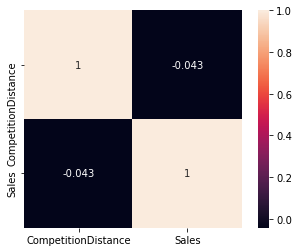

In [59]:
sns.heatmap(towncorr,annot=True,square=True)
fig=plt.gcf()
figsize=fig.get_size_inches()
plt.show()

The distance does not matter if the store and its competitors are in the same city since there is still very little correlation between distance and sales

### How does the opening and reopening of new competitors affect stores

In [60]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [61]:
store_nocompetition=store.loc[store['Store']==879]
store_nocompetition

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [62]:
s=train_df.loc[train_df['Store']==879] & [train_df['CompetitionDistance']!='NaN']

C:\Users\user.DESKTOP-OMQ89VA\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: Unable to coerce to Series, length must be 23: given 1

In [ ]:
s=train_df.loc[(train_df['Store']==291)& (train_df['CompetitionDistance']!='NaN'),['Store','Sales','CompetitionDistance']]
s['CompetitionDistance'].unique()

In [ ]:
# Data preprocessing